This jupyter notebook will serve as the notebook for your capstone project. Each week we will add new sections to the this notebook and you will submit the entire notebook for the weekly assignment. 

# Introduction

Week 1: write 1-2 paragraphs introducing your project idea. 

- Recently data analytics is very important tool to answer some critical question. In banking world if bank is giving some person a lone so it is important to determine that person’s income. It is also important to check for income if someone is applying for some services designed for low income people.
    
- In USA average income of people is between 50K and 60K. So if the person has annual income greater than 50K he has income above average income. This data set contains information about people’s educational level also. By combining these data we can determine that if there is any impact of education on income or not.

# Dataset

Week 1: provide a link to the datasource and briefly describe what it is. 

- Data set contains information about employs  in government or non government or self employed.  It also contains information about sex, age, nationality, annual income etc, it has total 15 attributes which has mixed data type of integer, string and float. We are using “income” attribute to determine wither that person has annual income 50,000 or not.
Link for Data Base: https://archive.ics.uci.edu/ml/datasets/Census+Income


# Project Definition

Week 1: write a sentence that defines exactly what you are trying to predict (remember it has to be 2 classes). For example:  For each diabetes patient, this project will predict if that patient will be readmitted within 30 days. 

- This project will predict If the person has income greater than 50K or not. I have got prevalence of the positive class 0.241

# Data Exploration

Week 1: Write Python code to 

1) load your dataset into a dataframe (df)

2) define an OUTPUT_LABEL

3) calculate the prevalence of the positive class

In [78]:
# your code here
import pandas as pd
df = pd.read_csv('income_uci.csv')

In [79]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Create a column called OUTPUT_LABEL based on your data that is 0 for your negative class and 1 for your positive class

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [81]:
df.income.head(5)

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

In [82]:
df['OUTPUT_LABEL'] = (df.income == ' >50K').astype('int')

In [83]:
df[['OUTPUT_LABEL']].head()

,OUTPUT_LABEL
0,0
1,0
2,0
3,0
4,0


Calculate the prevalence of the positive class

In [84]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [85]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.241


Week 1: in relation to your project, describe what the prevalence is.  

Week 1: Stop here

Week 2: briefly explore the columns and unique values of your dataset. 

Week 2: briefly describe your observations of the dataset

- age attribute can be used to compare it with annual income.
- native-country has 41 unique values so we can optimise that and use as features .
- education  can be related to income so we can use education of person as feature.
- marital status has data type string.
- race attribute can be used as feature.
- fnlwgt is come king of id related with that job so we can not use that.
- attributes capital-gain, capital loss. can also be used.
- sex would be not appropriate to use as feature.
- hours per week can be also used after optimization.
- occupation is also an important attribute to use.


# Feature Engineering

Week 2: Briefly describe what 'feature engineering' is. For each feature type (e.g. numerical, categorical, etc) you have in your project, please describe what is it is. If you use one-hot encoding, please describe in your own words what that technique is. 

- Features helps algorithm to predict. Feature engineering is process of finding some useful features from your data base. 
- I have created total 22 Features. 3 are numerical and 19 are categorical features. I have used education, native country and race attributes to create features.  
- For categorical features I have used technique called  one-hot encoding. It is technique to convert categorical variables in to numerical values. Because machine learning algorithms cannot process strings to predict.


In [86]:
print('Total collumns',len(df.columns))

Total collumns 16


In [87]:
for c in list(df.columns):
    n = df[c].unique()
    
    if len(n)<25:
        print(c)
        print(n)
    else:
        print(c + ':' +str(len(n)) + 'unique values')

age:73unique values
workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt:21648unique values
education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-I

Week 2: Make a new dataframe that only has the columns of interest. Double check that the columns used to define your OUTPUT_LABEL are not part of cols_input! 


In [88]:
import numpy as np

In [89]:
df = df.replace('?',np.nan)

In [90]:
cols_num = ['capital-gain','hours-per-week','capital-loss']

In [91]:
df[cols_num].isnull().sum()

capital-gain      0
hours-per-week    0
capital-loss      0
dtype: int64

In [92]:
cols_cat = ['race']

In [93]:
df[cols_cat].isnull().sum()

race    0
dtype: int64

In [94]:
print('Number native-country:', df.education.nunique())
df.groupby('native-country').size().sort_values(ascending = False)

Number native-country: 16


native-country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [95]:
top_5 = [' United-States',' Mexico',' ?',' Canada',' Germany']

# make a new column with duplicated data
df['orijin'] = df['native-country'].copy()

# replace all specialties not in top 10 with 'Other' category
df.loc[~df.orijin.isin(top_5),'orijin'] = 'Other'

In [96]:
df.groupby('orijin').size()

orijin
 ?                  583
 Canada             121
 Germany            137
 Mexico             643
 United-States    29170
Other              1907
dtype: int64

In [97]:
print('Number education:', df.education.nunique())
df.groupby('education').size().sort_values(ascending = False)

Number education: 16


education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
dtype: int64

In [98]:
top_10 = [' Bachelors',' HS-grad',' 11th',' Masters',' 9th',' Some-college',' Assoc-acdm',' Assoc-voc',' 7th-8th',' 10th']

# make a new column with duplicated data
df['edu'] = df['education'].copy()

# replace all specialties not in top 10 with 'Other' category
df.loc[~df.edu.isin(top_10),'edu'] = 'Other'

In [99]:
df.groupby('edu').size()

edu
 10th              933
 11th             1175
 7th-8th           646
 9th               514
 Assoc-acdm       1067
 Assoc-voc        1382
 Bachelors        5355
 HS-grad         10501
 Masters          1723
 Some-college     7291
Other             1974
dtype: int64

In [100]:
df['race'] = df['race'].fillna('UNK')

In [101]:
df.race.head()

0     White
1     White
2     White
3     Black
4     Black
Name: race, dtype: object

In [102]:
pd.get_dummies(df['race'],prefix = 'race').head()

,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0


In [103]:
pd.get_dummies(df['race'],prefix = 'race', drop_first = True).head()

,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [104]:
pd.get_dummies(df[cols_cat],drop_first = True).head()

,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [105]:
df_cat = pd.get_dummies(df[cols_cat + ['edu'] + ['orijin'] ],drop_first = True)

In [106]:
df_cat.head()

,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,edu_ 11th,edu_ 7th-8th,edu_ 9th,edu_ Assoc-acdm,edu_ Assoc-voc,edu_ Bachelors,edu_ HS-grad,edu_ Masters,edu_ Some-college,edu_Other,orijin_ Canada,orijin_ Germany,orijin_ Mexico,orijin_ United-States,orijin_Other
0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [107]:
df = pd.concat([df,df_cat], axis = 1)

In [108]:
cols_all_cat = list(df_cat.columns)

In [109]:
df[cols_num + cols_all_cat ].isnull().sum().sort_values(ascending = False).head(10)

orijin_Other                0
orijin_ United-States       0
hours-per-week              0
capital-loss                0
race_ Asian-Pac-Islander    0
race_ Black                 0
race_ Other                 0
race_ White                 0
edu_ 11th                   0
edu_ 7th-8th                0
dtype: int64

In [110]:
print('Total number of features:', len(cols_num + cols_all_cat))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))



Total number of features: 22
Numerical Features: 3
Categorical Features: 19


In [111]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['OUTPUT_LABEL']]

# Building Training/Validation/Test Samples

Week 2: In your own words, describe what are training / validation and test samples used for. 

- We  have divided our data in to 3 parts training validation and test.
- Training  data is used to train our machine learning models on how to do prediction.
- Validation data set are used to validate that the model we have selected and trained  Is really effective or not.
- Test data are used to test our model. Check how our model is performing  on unseen data.


Week 2: Create a training (df_train_all), validation (df_valid) and test (df_test) set. 

In [112]:
df[cols_input].isnull().sum().sort_values(ascending = False).head(10)

orijin_Other                0
orijin_ United-States       0
hours-per-week              0
capital-loss                0
race_ Asian-Pac-Islander    0
race_ Black                 0
race_ Other                 0
race_ White                 0
edu_ 11th                   0
edu_ 7th-8th                0
dtype: int64

In [113]:
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

- Deviding total data in 70% and 30%

In [114]:
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [115]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

- 30% data further devided in to 50%

In [116]:
# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [117]:
# check the prevalence of each 
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 4884):0.234
Valid prevalence(n = 4884):0.243
Train all prevalence(n = 22793):0.242


- Prevalence of all three data set are almost same.

Week 2: take your df_train_all and create a balanced dataset. Briefly explain in your own words why we need to balance and a few techniques for balancing the dataset. 

In [118]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 11028):0.500


Week 2: Save all 4 dataframes to csv and the cols_input

In [119]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [120]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

Week 2: fill any missing values with the mean value

In [121]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [122]:
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [123]:
# load the means so we know how to do it for the test data
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head(5)

,col,mean_val
0,capital-gain,1068.046242
1,hours-per-week,40.418286
2,capital-loss,87.580880
3,race_ Asian-Pac-Islander,0.031325
4,race_ Black,0.095336


In [124]:
print('race' in cols_cat)

True


In [125]:
df_train_all = fill_my_missing(df_train_all, df_mean_in, cols_input)
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)

In [126]:
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (22793, 22)
Training shapes: (11028, 22) (11028,)
Validation shapes: (4884, 22) (4884,)


Week 2: create a scalar, save it, and scale the X matrices

In [127]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [128]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [129]:
scaler = pickle.load(open(scalerfile, 'rb'))

In [130]:
# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Model Selection 

Each week: briefly describe what this section does. It will change as we learn more about machine learning. 

- In this section we will evaluate different models used for prediction and based on results we will decide which model will be best for our project and data.

In [131]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

Since we balanced our training data, let's set our threshold at 0.5 to label a predicted sample as positive. 

In [132]:
thresh = 0.5

## Model Selection: baseline models

### K nearest neighbors (KNN)

Week 2: Briefly describe how KNN works in your own words. 

KNN is one of the  models which predicts outcome of particular event based on their similar event. if we choose k=5 in KNN it will look to 5 similar condition around our problem. Euclidean distance is calculated as Euclidean Distance(x, xi) = sqrt( sum( (xj – xij)^2 ) )

Week 2: train a KNN and evaluate performance

In [133]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

In [134]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.789
accuracy:0.712
recall:0.653
precision:0.740
specificity:0.764
prevalence:0.500
 
Validation:
AUC:0.782
accuracy:0.742
recall:0.641
precision:0.477
specificity:0.767
prevalence:0.243
 


Week 2: STOP HERE

### Logistic Regression

Week 3: Briefly describe how logistic regression works in your own words. 

Logistic regression the relationship between our data and class we have created. It uses logistic function on data set for prediction. Logistic regression is a linear method, but the predictions are transformed using the logistic function. 


Week 3: train a logistic regression and evaluate the performance

In [135]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [136]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.797
accuracy:0.713
recall:0.667
precision:0.735
specificity:0.760
prevalence:0.500
 
Validation:
AUC:0.802
accuracy:0.744
recall:0.671
precision:0.481
specificity:0.768
prevalence:0.243
 


### Stochastic Gradient Descent

Week 3: Briefly describe how stochastic gradient descent works in your own words. 

Gradient Descent iteratively adjusts the values, using calculus, so that they minimize the given cost-function. So it is used for optimizing and to update some parameter if needed.  It is a process to iteratively learn the weights in logistic Regression.  It is simple to implement. Scaling of features can affect Stochastic Gradient Descent.


Week 3: train a stochastic gradient descent model and evaluate the performance

In [137]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [138]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descend
Training:
AUC:0.779
accuracy:0.703
recall:0.644
precision:0.731
specificity:0.763
prevalence:0.500
 
Validation:
AUC:0.782
accuracy:0.740
recall:0.653
precision:0.473
specificity:0.767
prevalence:0.243
 


### Naive Bayes

Week 3: Briefly describe how naive bayes works in your own words. 

By using Bayes Theorem. It predicts membership probabilities for each class such as the probability that given record or data point belongs to a particular class or not. Naïve Bayes will assumes that all features are independent of each other. Naive Bayes is very fast it takes less time than other classifiers.


Week 3: train naive bayes model and evaluate the performance

In [139]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [140]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.771
accuracy:0.697
recall:0.635
precision:0.726
specificity:0.760
prevalence:0.500
 
Validation:
AUC:0.776
accuracy:0.740
recall:0.634
precision:0.473
specificity:0.774
prevalence:0.243
 


### Decision Tree Classifier

Week 3: Briefly describe how decision tree model works in your own word

It is used to solve regression and classification problems. It works on very simple logic. It generates tree based on result of our equation to predict. Max_depth is parameter that tells algorithm where to stop. If we do not provide max_depth it will expand tree until it reaches to pure leaf. Decision tree does not require any data normalization


Week 3: train decision tree model and evaluate the performance

In [141]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [142]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.825
accuracy:0.741
recall:0.709
precision:0.757
specificity:0.772
prevalence:0.500
 
Validation:
AUC:0.795
accuracy:0.738
recall:0.689
precision:0.472
specificity:0.753
prevalence:0.243
 


### Random Forest

Week 3: Briefly describe how random forest model works in your own words. 

Random forest algorithm can use both for classification and the regression kind of problems. It is similar to decision tree classifier but with the more number of trees. The higher the number of trees in the forest gives the high accuracy results. Max_depth is parameter that tells algorithm where to stop. If we do not provide max_depth it will expand tree until it reaches to pure leaf.


Week 3: train random forest model and evaluate the performance

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [144]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.800
accuracy:0.706
recall:0.673
precision:0.721
specificity:0.739
prevalence:0.500
 
Validation:
AUC:0.794
accuracy:0.717
recall:0.661
precision:0.445
specificity:0.736
prevalence:0.243
 


### Gradient Boosting Classifier

Week 3: Briefly describe how gradient boosting classifier model works in your own words. 

Gradient descent is used to minimize a set of parameters. After calculating error or loss, the weights are updated to minimize that error. Gradient Boosting Classifier is latest and more effective than others. Split is different every time because GBC permutes features every time.


Week 3: train gradient boosting model and evaluate the performance

In [145]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [146]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.858
accuracy:0.767
recall:0.723
precision:0.792
specificity:0.810
prevalence:0.500
 
Validation:
AUC:0.822
accuracy:0.762
recall:0.708
precision:0.507
specificity:0.780
prevalence:0.243
 


## Analyze results baseline models

Let's make a dataframe with these results and plot the outcomes using a package called seaborn.

In [147]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,]})

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

Week 3: Pick one performance metric that you will use for picking the best model. Explain your choice of performance metric. Make a bar plot of this performance metric below to demonstrate the baseline performance. 

- I have chosen AUC area under the curve as performance model. If Auc is near 0.5 it means our model is randomly predicting. And if it is 1 than our model is cheating. So in ideal condition our AUC should be between 0.5 and 1.

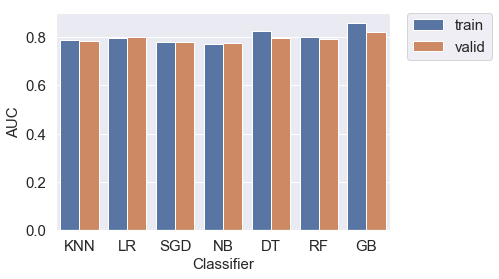

In [149]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

Week 3: STOP HERE

## Learning Curves

Week 4: Using your baseline model that has the best performance on the validation set, plot a learning curve for that model. 

In [150]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

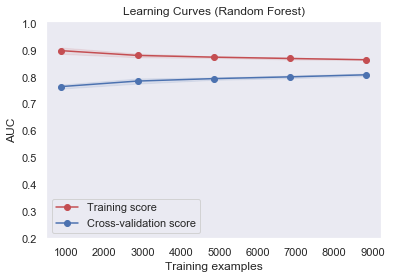

In [151]:
from sklearn.ensemble import RandomForestClassifier
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 20, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

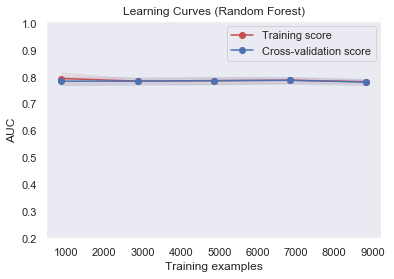

In [152]:
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 3, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

Week 4: Identify if your model has high variance or high bias. Briefly discuss what techniques could be used to improve performance of that model.  

- 	I have plotted learning curve for random forest classifier
-	We can see that difference between training data set and validation data is not that big so our model is not over fitting.
-	But from second curve we can see that our data is biased.

-	To make our data less biased I have added more features and done hyperperameter tuning.


## Feature Importance

Week 4: Plot the feature importance for logistic regression and random forest models here. 

In [153]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [154]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [155]:
feature_importances.head()

,importance
capital-gain,2.452268
edu_ Bachelors,0.790923
edu_ Masters,0.575291
hours-per-week,0.539748
edu_ Some-college,0.501297


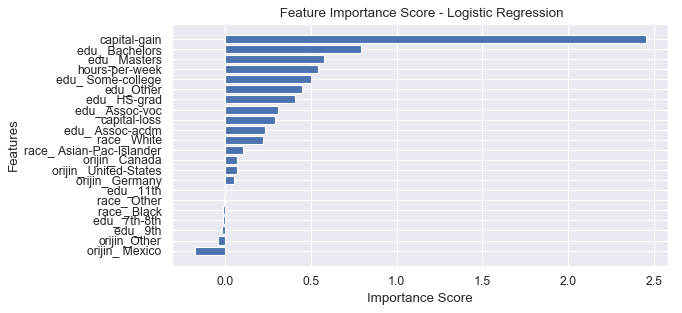

In [156]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title(' Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

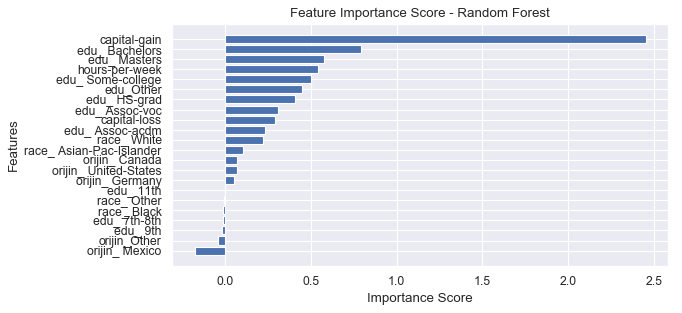

In [157]:
num = np.min([30, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

Week 4: Briefly discuss any observations you have of the feature importances. 

- Result of feature importance for both the model is same.
- 	capital-gain, edu-masters, edu-somecollage, edu- bachelors, these featurs have high importance in predicting. That means if you have  high capital gain or you have completed education till collage than you have higher chance of having income >50K.
- 	Orijin_mexico has highest negative importance. That means if your native country is Mexico you have less chance of having income >50K
 .


## Hyperparameter tuning

Week 4: Using your best baseline model, pick a hyperparameter and show its effect for a range of values (similar to what we did for the random forest and max_depths in the diabetes project. )

In [158]:
# max depths
max_depths = np.arange(2,20,2)

train_aucs = np.zeros(len(max_depths))
valid_aucs = np.zeros(len(max_depths))

for jj in range(len(max_depths)):
    max_depth = max_depths[jj]

    # fit model
    rf=RandomForestClassifier(n_estimators = 100, max_depth = max_depth, random_state = 42)
    rf.fit(X_train_tf, y_train)        
    # get predictions
    y_train_preds = rf.predict_proba(X_train_tf)[:,1]
    y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)

    # save aucs
    train_aucs[jj] = auc_train
    valid_aucs[jj] = auc_valid

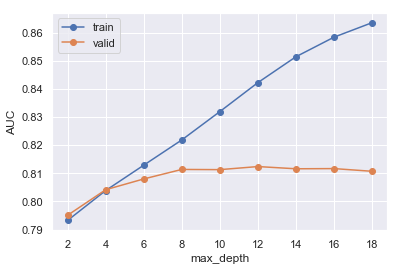

In [159]:
import matplotlib.pyplot as plt

plt.plot(max_depths, train_aucs,'o-',label = 'train')
plt.plot(max_depths, valid_aucs,'o-',label = 'valid')

plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.legend()
plt.show()

Week 4: Using RandomizedSearchCV, optimize a few of your baseline models. 
    Note that GradientBoosting Classifier may take a while so you might need to adjust the number of iterations or specific parameters. If this takes too long on your computer, feel free to take that one out. 

In [160]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [161]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(2,20,2)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [162]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [163]:
# create a baseline model
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring,verbose = 1, random_state = 42)

In [164]:
import time
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  7.4min finished


463.81227135658264


In [165]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 16,
 'criterion': 'entropy'}

In [166]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))

C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Baseline Random Forest
Training AUC:0.800
Validation AUC:0.794
Optimized Random Forest
Training AUC:0.854
Validation AUC:0.812


In [167]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [168]:
penalty = ['none','l2','l1']
max_iter = range(200,1000,200)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: 

C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: 

C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: 

132.13893938064575


In [169]:
sgdc_random.best_params_

{'penalty': 'none', 'max_iter': 600, 'alpha': 0.1}

In [170]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline sgdc')
sgdc_train_base_auc = roc_auc_score(y_train, y_train_preds)
sgdc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_base_auc))
print('Validation AUC:%.3f'%(sgdc_valid_base_auc))

print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_opt_auc))
print('Validation AUC:%.3f'%(sgdc_valid_opt_auc))

Baseline sgdc
Training AUC:0.779
Validation AUC:0.782
Optimized sgdc
Training AUC:0.794
Validation AUC:0.798


In [171]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [172]:
# number of trees
n_estimators = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

120.88920450210571


In [173]:
gbc_random.best_params_

{'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.1}

In [174]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline gbc')
gbc_train_base_auc = roc_auc_score(y_train, y_train_preds)
gbc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_base_auc))
print('Validation AUC:%.3f'%(gbc_valid_base_auc))
print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_opt_auc))
print('Validation AUC:%.3f'%(gbc_valid_opt_auc))

Baseline gbc
Training AUC:0.858
Validation AUC:0.822
Optimized gbc
Training AUC:0.847
Validation AUC:0.827


Week 4: Make a plot comparing the performance of the optimized models to the baseline models. 

In [175]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['baseline','optimized']*3,
                          'auc':[sgdc_valid_base_auc,sgdc_valid_opt_auc,
                                 rf_valid_base_auc,rf_valid_opt_auc,
                                 gbc_valid_base_auc,gbc_valid_opt_auc],
                          })

In [176]:
df_results

,classifier,data_set,auc
0,SGD,baseline,0.781747
1,SGD,optimized,0.797558
2,RF,baseline,0.793767
3,RF,optimized,0.812335
4,GB,baseline,0.821781
5,GB,optimized,0.827082


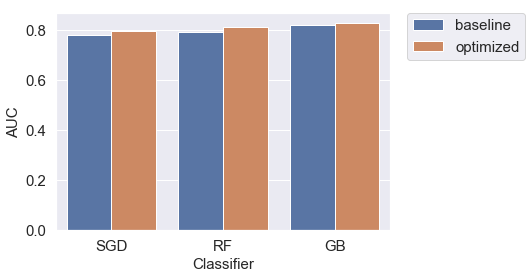

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

## Pick your best model

Week 4: Pick your best model. Explain why you picked it. Save the model using pickle.


- After hyper-parameter tuning   AUC in Stochastic Gradient Descend is increasing for validation data set.
- While in random forest classifier AUC is increasing but difference between training and validation performance is high
- Stochastic Gradient Descend has smallest difference between training and validation performance.
- Stochastic Gradient Descend is best model for my case.


In [178]:
pickle.dump(sgdc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

Week 4: STOP HERE

# Model Evaluation

WEEK 5: evaluate the performance of your best model on the training, validation and test sets. Make an ROC curve too.

In [179]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [180]:
# load the model, columns, mean values, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))


In [181]:
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [182]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vadivatsal\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [183]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [184]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.794
accuracy:0.713
recall:0.660
precision:0.739
specificity:0.767
prevalence:0.500
 
Validation:
AUC:0.798
accuracy:0.744
recall:0.672
precision:0.481
specificity:0.768
prevalence:0.243
 
Test:
AUC:0.794
accuracy:0.745
recall:0.643
precision:0.468
specificity:0.777
prevalence:0.234
 


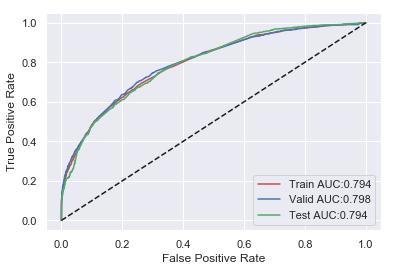

In [185]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Conclusion

Week 5: Briefly summarize your project and describe your performance as if you were talking to a CEO. 

-	Our Ml algorithms are 2 times better than randomly gassing algorithms.
-	Based on results of test data we can say that we have perfectly selected and trained our machine learning algorithm because it is not over fitting or under fitting. 



CONGRATS! 